<a href="https://colab.research.google.com/github/pitrovic/Simple-CNN-model/blob/Alpha_Branch/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Importing the dataset cifar10
from tensorflow.keras.datasets import cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [13]:
#Normalizing pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
#Converting labels into one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

#Input layer: 32x32x3 images
#Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
#Max pooling layer with 2x2 pool size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

#Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
#Max pooling layer with 2x2 pool size
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

#Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
#Max pooling layer with 2x2 pool size
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

#flatten the 3D output to a 1D vector
model.add(Flatten())

#Fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [16]:
#Compiling the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Training the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 349s 222ms/step - loss: 1.5784 - accuracy: 0.4178 - val_loss: 1.2184 - val_accuracy: 0.5611
Epoch 2/10
1563/1563 [==============================] - 347s 222ms/step - loss: 1.0539 - accuracy: 0.6270 - val_loss: 0.9789 - val_accuracy: 0.6554
Epoch 3/10
1563/1563 [==============================] - 346s 222ms/step - loss: 0.8525 - accuracy: 0.6984 - val_loss: 0.9064 - val_accuracy: 0.6879
Epoch 4/10
1563/1563 [==============================] - 342s 219ms/step - loss: 0.7202 - accuracy: 0.7476 - val_loss: 0.7787 - val_accuracy: 0.7276
Epoch 5/10
1563/1563 [==============================] - 339s 217ms/step - loss: 0.6129 - accuracy: 0.7838 - val_loss: 0.8327 - val_accuracy: 0.7211
Epoch 6/10
1563/1563 [==============================] - 339s 217ms/step - loss: 0.5242 - accuracy: 0.8158 - val_loss: 0.7827 - val_accuracy: 0.7450
Epoch 7/10
1563/1563 [==============================] - 341s 218ms/step - loss: 0.4507 - accuracy: 0.8423 - val_

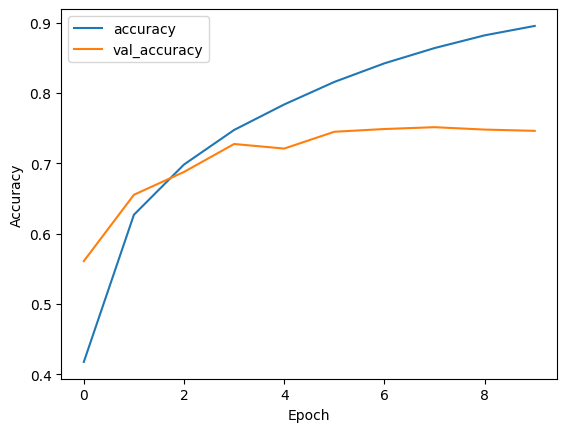

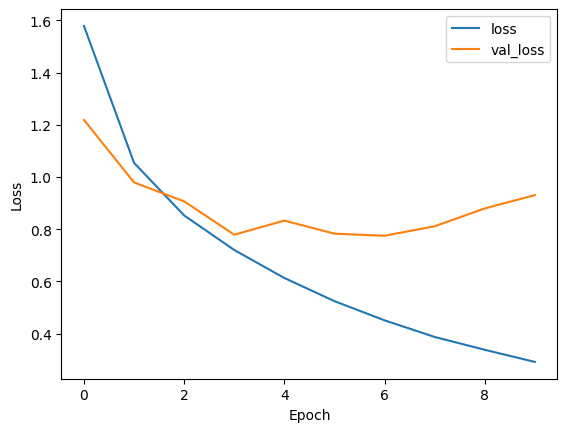

In [17]:
import matplotlib.pyplot as plt
#Plotting Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Plotting Loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
import numpy as np

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)